In [68]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter, circle
from skimage.util import img_as_ubyte
from skimage.io import imread, imsave

from pdf2image import convert_from_path, convert_from_bytes

"""
TODO: definir guia para deteccao de somente os circulos das alternativas
"""

'\nTODO: definir guia para deteccao de somente os circulos das alternativas\n'

In [93]:
from skimage import __version__ as ski_version
ski_version

'0.15.0'

In [69]:
images = convert_from_path('modelo.pdf')
for image in images:
    image.save('modelo.png', 'PNG')

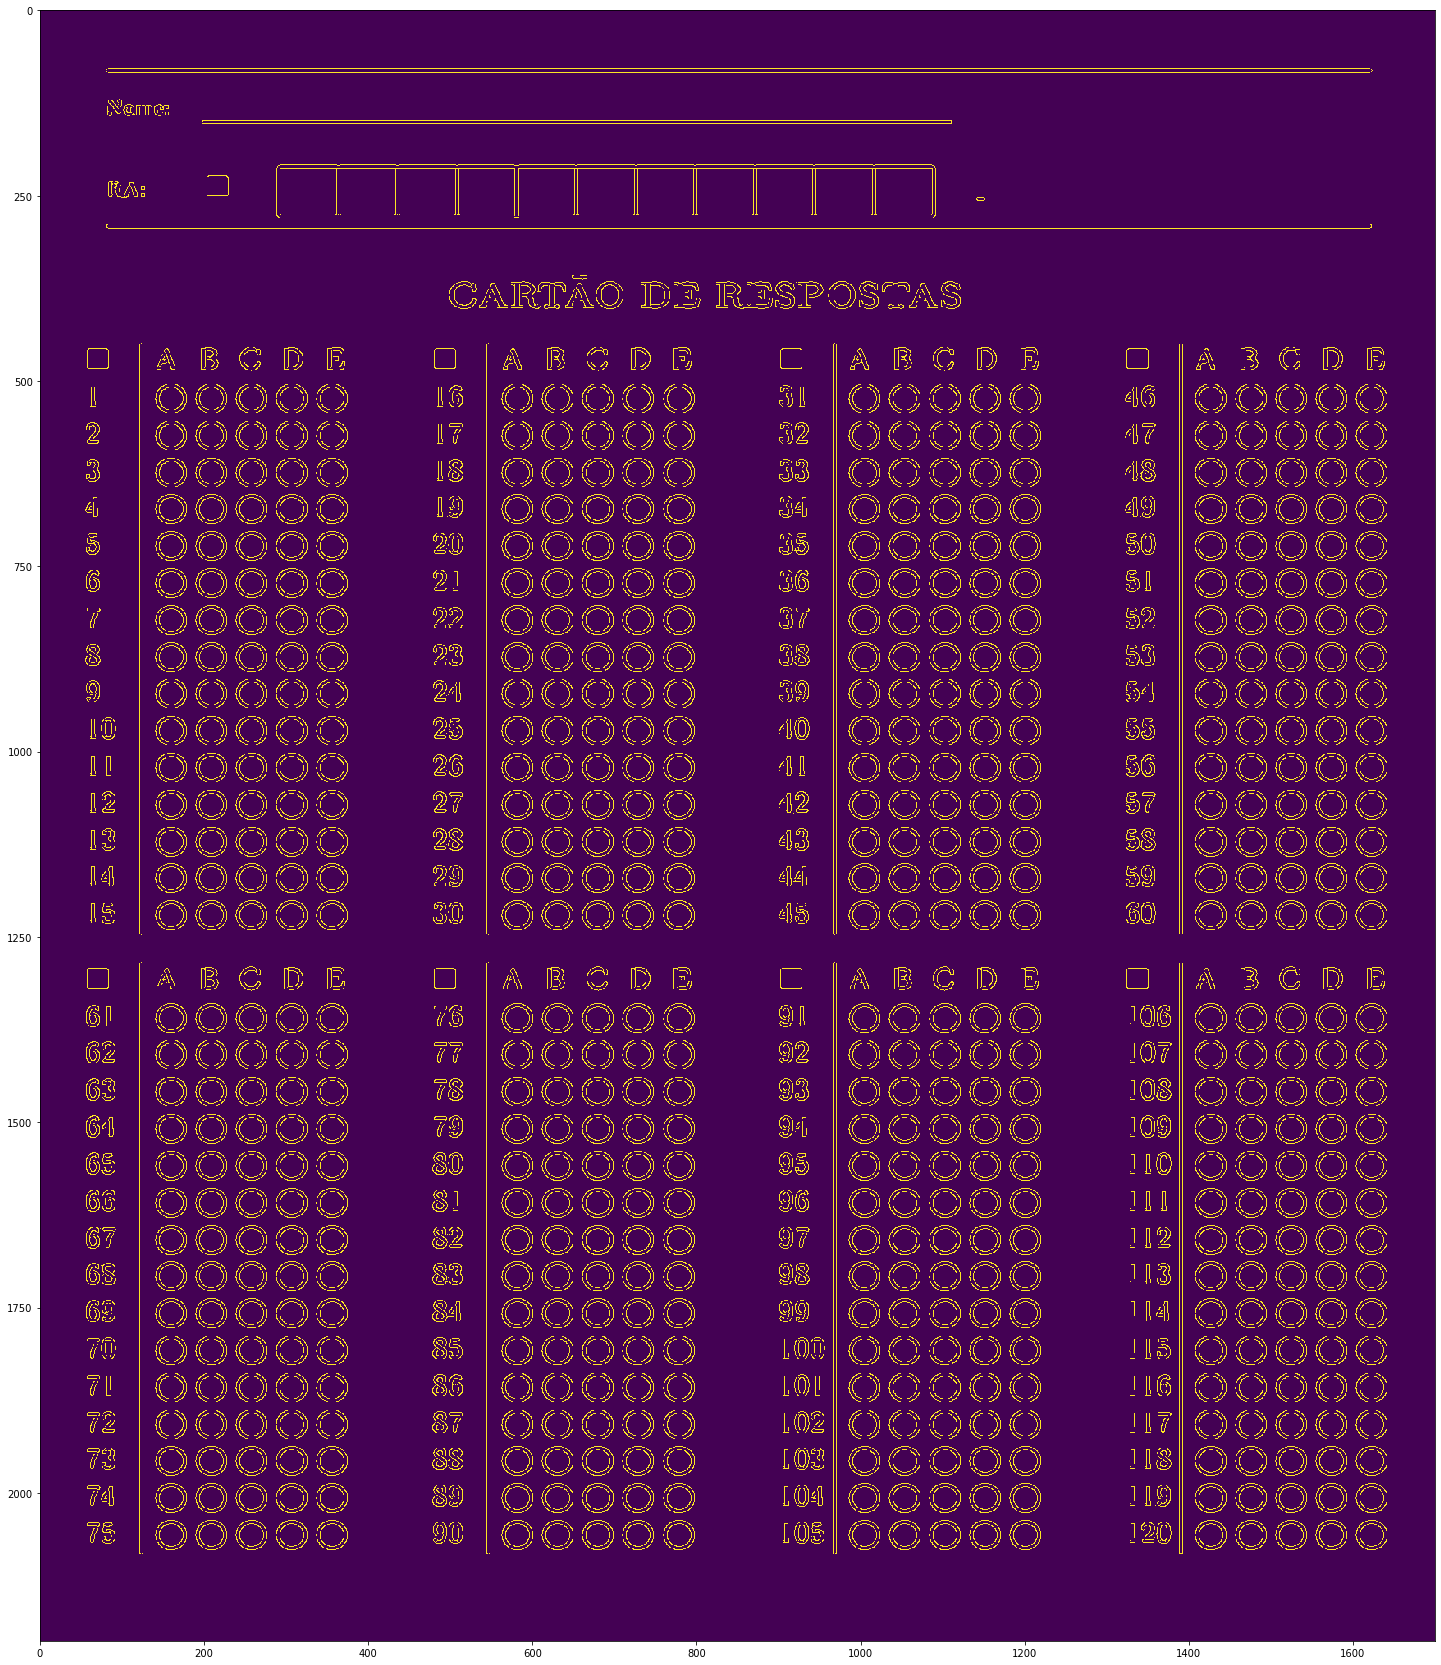

In [71]:
# Load picture and detect edges
image = imread('modelo.png', as_gray=True)
image = img_as_ubyte(image)
edges = canny(image=image, sigma=2, low_threshold=10, high_threshold=10)

plt.figure(figsize=(25,30))
plt.imshow(edges, aspect='auto')
plt.savefig('edges.png')

In [72]:
plt.clf()
plt.cla()
plt.close()

In [88]:
# Detect two radii
hough_radii = np.arange(15, 20, 2)
hough_res = hough_circle(edges, hough_radii)

accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=120*5)

In [89]:
# display(accums, cx, cy, radii)

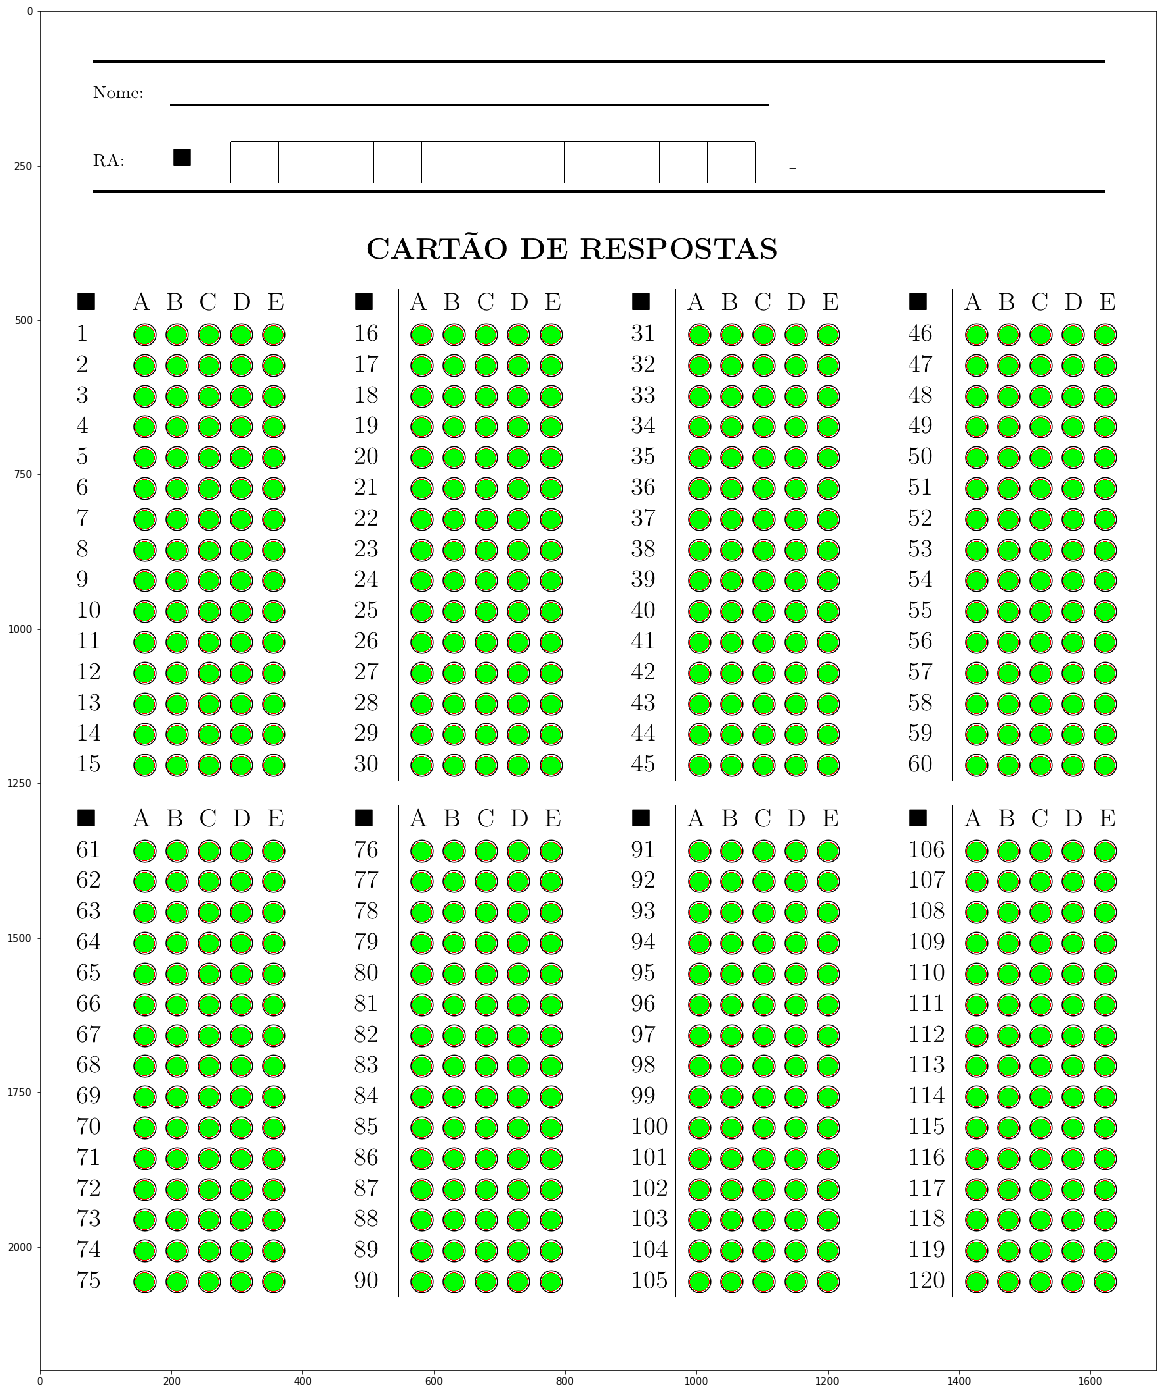

In [90]:
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (0, 255, 0)
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (255, 0, 0)

plt.figure(figsize=(20,25))
plt.imshow(image, aspect='auto')
imsave('out.png', image)